# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
def plot_classifier(classifier, X, y):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size =0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot
    plt.figure()

    # choose a color scheme you can find all the options
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.Set1)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1, alpha=0.6, cmap=plt.cm.Paired)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(min(X[:, 0])-1), int(max(X[:, 0])+1), 1.0)))
    plt.yticks((np.arange(int(min(X[:, 1])-1), int(max(X[:, 1])+1), 1.0)))
    
    plt.show()

## Data

In [3]:
dataset = pd.read_csv('../data/data_multivar.txt', header=None)
dataset.head()

,0,1,2
0,8.73,0.31,2
1,4.71,-0.42,3
2,4.58,6.18,1
3,9.38,2.18,2
4,4.78,5.28,1


In [4]:
x = dataset.values[:, :-1]
y = dataset.values[:, -1]

In [5]:
y

array([ 2.,  3.,  1.,  2.,  1.,  0.,  2.,  3.,  2.,  0.,  2.,  0.,  3.,
        1.,  0.,  3.,  0.,  3.,  2.,  3.,  0.,  0.,  3.,  1.,  1.,  2.,
        3.,  3.,  1.,  2.,  2.,  2.,  0.,  2.,  3.,  3.,  3.,  3.,  3.,
        0.,  0.,  2.,  1.,  2.,  1.,  0.,  3.,  3.,  0.,  2.,  1.,  2.,
        2.,  3.,  3.,  2.,  2.,  0.,  1.,  3.,  3.,  0.,  1.,  3.,  0.,
        3.,  3.,  1.,  3.,  1.,  3.,  2.,  2.,  0.,  1.,  2.,  0.,  3.,
        3.,  1.,  3.,  3.,  2.,  1.,  0.,  0.,  1.,  0.,  2.,  2.,  3.,
        1.,  1.,  1.,  3.,  0.,  3.,  1.,  1.,  1.,  2.,  2.,  1.,  3.,
        0.,  0.,  0.,  0.,  2.,  2.,  3.,  1.,  0.,  2.,  0.,  3.,  0.,
        2.,  0.,  3.,  3.,  0.,  3.,  3.,  0.,  2.,  2.,  3.,  0.,  1.,
        1.,  3.,  2.,  1.,  0.,  1.,  2.,  2.,  1.,  0.,  3.,  1.,  2.,
        2.,  2.,  1.,  0.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  1.,  0.,
        3.,  2.,  2.,  0.,  2.,  2.,  1.,  3.,  3.,  1.,  3.,  3.,  1.,
        1.,  2.,  3.,  1.,  3.,  2.,  0.,  2.,  2.,  2.,  1.,  0

## Training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_test_pred = nb_model.predict(X_test)

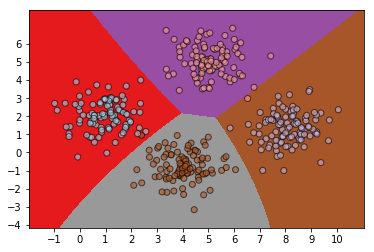

In [7]:
plot_classifier(nb_model, x, y)

## Accuracy 

In [8]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / y_test.shape[0]
print accuracy

98.0


## Metrics

In [12]:
from sklearn.model_selection import cross_val_score

num_validations = 5
accuracy = cross_val_score(nb_model, x, y, scoring='accuracy', cv=num_validations)
print 'Accuracy: ' + str(round(100*accuracy.mean(), 2)) + '%'

f1 = cross_val_score(nb_model, x, y, scoring='f1_weighted', cv=num_validations)
print 'F1: ' + str(round(100*f1.mean(), 2)) + '%'

precision = cross_val_score(nb_model, x, y, scoring='precision_weighted', cv=num_validations)
print 'Precision: ' + str(round(100*precision.mean(), 2)) + '%'

recall = cross_val_score(nb_model, x, y, scoring='recall_weighted', cv=num_validations)
print 'Recall: ' + str(round(100*recall.mean(), 2)) + '%'

Accuracy: 99.5%
F1: 99.5%
Precision: 99.52%
Recall: 99.5%
